# Energy Analysis Sensitivity of Lifetime, Efficiency, and Material Circularity
This journal complements the 17-Energy Results journal to understand the sensitivity of our metrics to three module design aspects; lifetime, efficiency, and material circularity. This journal creates a simple modern module; 25 years, 20% efficiency, no material circularity, and modifies first one parameter, and then two parameters at a time. This will allow us to elucidate if there are multiplicative effects of changing design aspects

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis'/'Sensitivity')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+500.g00181a8.dirty'

In [4]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
#load in a baseline and materials for modification
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


## Create Sensitivity Scenarios
First, examine only the effect of one set of parameters (life, eff, material circularity) at a time. Possibly get to interactions.

In [6]:
timeshift = 2022-1995

### Life

In [7]:
#life sensitivity
#mod_reliability_t50, mod_reliability_t90, mod_degradation, mod_lifetime

sim1.createScenario(name='life_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_high', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_high', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim1.modifyScenario('life_high', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_high', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #project lifetime of 25 years

#--------------------------------------------------------------------------------------

#life low
sim1.createScenario(name='life_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['life_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim1.modifyScenario('life_low', 'mod_degradation', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim1.modifyScenario('life_low', 'mod_reliability_t50',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim1.modifyScenario('life_low', 'mod_reliability_t90',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim1.modifyScenario('life_low', 'mod_lifetime',
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years



### Efficiency

In [8]:
sim1.createScenario(name='eff_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#-------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_high_bifi', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_high_bifi'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_high_bifi', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

#------------------------------------------------------------------------------------------------------

sim1.createScenario(name='eff_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['eff_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
sim1.modifyScenario('eff_low', 'mod_eff', 
                    sim1.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

### Material Circularity
Here, we will use recycling as a stand in for the forms of material circularity. We set to 0%, 25%, and 100% closed loop (through mat_PG4_Recycling_target). This will give us the maximum and minimum, as well as a middle value that is a change more comparable to varying lifetime and efficiency (also changed by 20-30%). Using the recycling target variable means that it will not spend energy on recycling unless it is a target.

In [9]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb2_stored','mod_EOL_pb3_reMFG'] #removed landfills

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

#path control variables are:
# 'mat_PG4_Recycling_target'
# 'mat_MFG_scrap_Recycled'
# 'mod_EOL_pg4_recycled'
# 'mod_EOL_pb4_recycled'

In [10]:
sim1.createScenario(name='circ_high', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_high'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_high', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_high', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim1.modifyScenario('circ_high','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim1.modifyScenario('circ_high','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_high', mod_circ_vars[var], 100.0, start_year=2022) #set recycle paths to 100%

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim1.scenario['circ_high'].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled',100.0, start_year=2022) #

#--------------------------------------------------------------------------------------------------------
        
sim1.createScenario(name='circ_mid', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_mid'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_mid', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_mid', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim1.modifyScenario('circ_mid','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim1.modifyScenario('circ_mid','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_mid', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_mid'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim1.scenario['circ_mid'].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #
#-----------------------------------------------------------------------------------------------------------

sim1.createScenario(name='circ_low', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['circ_low'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#sim1.scenMod_noCircularity(scenarios='circ_low') #sets all years to 0
    
for var in range(0,len(mod_circ_vars)):
    sim1.modifyScenario('circ_low', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim1.modifyScenario('circ_low', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim1.modifyScenario('circ_low', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim1.modifyScenario('circ_low','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up 
sim1.modifyScenario('circ_low','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim1.scenario['circ_low'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [11]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silicon : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE silver : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE copper : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE encapsulant : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE backsheet : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  life_high
life_high glass : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silicon : Data trimmed for Energy, years now encompass  2000  to  2100
life_high silver : Data trimmed for Energy, years now encompass  2000  to  2100
life_high aluminium_frames : Data trimmed for Energy, years 

In [12]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [13]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [14]:
scennames_labels = sim1.scenario.keys()
scennames_labels

dict_keys(['PV_ICE', 'life_high', 'life_low', 'eff_high', 'eff_high_bifi', 'eff_low', 'circ_high', 'circ_mid', 'circ_low'])

In [15]:
bifiFactors = {'PV_ICE':0.0,
               'life_high':0.0,
               'life_low': 0.0,
               'eff_high': 0.0,
               'eff_high_bifi': 0.9,
               'eff_low': 0.0,
               'circ_high':0.0,
               'circ_mid':0.0,
               'circ_low': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [16]:
#CALCULATE MASS FLOWs
#13 scenarios, 7 mats = 

for scen in sim1.scenario.keys(): #loop over scenarios
    sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mate

In [17]:
#sim1.calculateMassFlow()

In [18]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots
sim1.saveSimulation(customname='_EnergySensitivity_identicalinstalls')

:) Saved Input and Output Dataframes


(0.0, 90.26425956655)

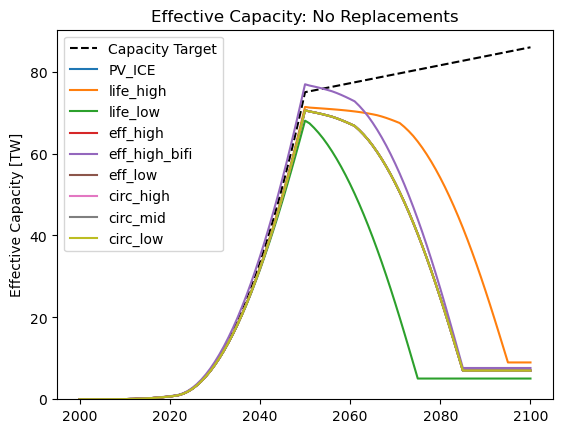

In [19]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

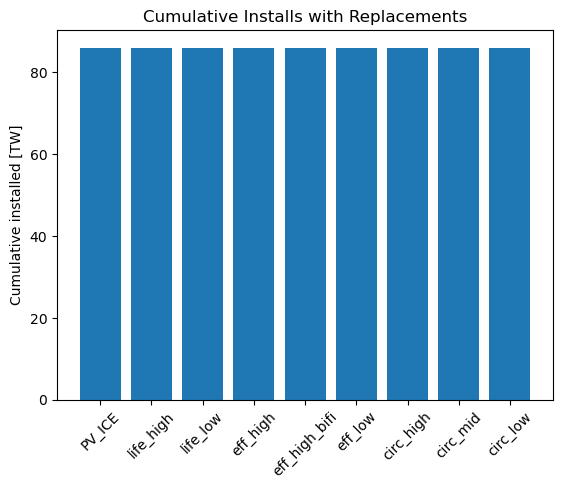

In [20]:
cumu_installs = ii_cumu.filter(like='newInstalled')
total_installed = cumu_installs.loc[2100]
total_installed.index= scennames_labels

plt.bar(scennames_labels, total_installed/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

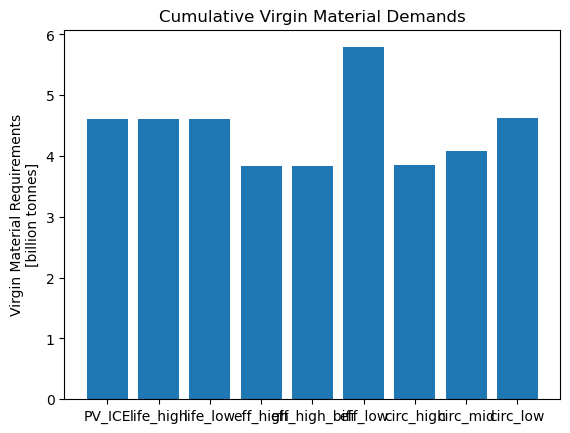

In [21]:
cumu_virgin_module = ii_cumu.filter(like='VirginStock_Module')
virgin = cumu_virgin_module.loc[2100]
virgin.index= scennames_labels

plt.bar(scennames_labels, virgin/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

In [22]:
sim1.scenario['eff_high'].dataIn_m

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
0,2000,808.669,13.420000,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
1,2001,284.317,13.600000,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
2,2002,344.073,13.722222,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
3,2003,527.971,13.844444,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
4,2004,1086.949,13.966667,19.0,23.0,0.75,20.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2096,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
97,2097,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
98,2098,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0
99,2099,219320.000,30.001640,40.0,44.0,0.50,35.0,98.0,0.0,0.0,...,60.0,0.0,0.0,40.0,0.0,100.0,60.0,0.0,0.0,40.0


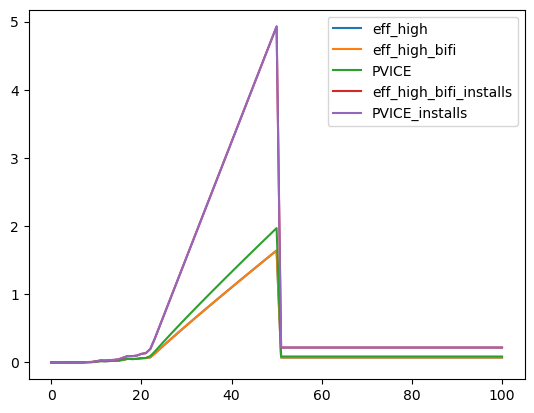

In [23]:
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high'].dataOut_m['Area']/1e10, label='eff_high')

#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Yearly_Sum_Area_PathsBad'])
#plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Cumulative_Active_Area'])
plt.plot(sim1.scenario['eff_high_bifi'].dataOut_m['Area']/1e10, label='eff_high_bifi')

plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Area']/1e10, label='PVICE')


plt.plot(sim1.scenario['eff_high_bifi'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='eff_high_bifi_installs')
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']/1e6, label='PVICE_installs')
plt.legend()

## Calculate Flows: Capacity Compensation

In [24]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim1.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim1.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim1.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim1.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim1.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
2
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
3
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
4
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
5
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
6
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
7
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
8
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
9
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
10
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
11
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
12
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
13
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
14
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
15
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
16
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
17
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
18
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
19
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
20
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522204.79505684547  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
21
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787030969.8975344  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92130764.51066588  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522281.0480266041  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315960505.1026145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1904912.986497598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185857396.31027597  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78240039.20964287  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
22
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787195276.6245084  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92137323.551914  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522370.0331784635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  315981852.8637393  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905079.478916816  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185870755.69400868  tonnes.
==> Working on Material :  backsheet
Recycled surplus E

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
23
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787421571.4978733  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92145977.2661618  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522470.6197191128  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316010223.10240877  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905299.08363438  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185888718.48207664  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78260304.15714504  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
24
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2787753322.5102015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92158135.3186515  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522593.43704018486  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316050622.1522593  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1905609.6324606165  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185913857.16491142  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78275471.89481662  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
25
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2788227043.1910014  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92175283.71670865  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522747.92204010184  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316107844.0453842  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1906031.5436963488  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185948190.46619388  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78296097.5906738  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
26
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2788888852.2380667  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92198945.35354482  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  522940.98065930686  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316187461.4129709  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1906594.3077959258  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  185994449.43586808  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78322998.88555433  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418253471.1418514  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10423569.155712938  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  65959.96369586585  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47346661.458926745  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266536.9044855057  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27802439.48817783  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11490817.59376988  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
27
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2789926501.1222167  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92235084.68404324  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523177.6819884945  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316309971.9112594  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1907391.761098963  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186064979.1339966  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78359045.09197274  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418492524.07159966  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10431894.913073406  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66014.10872178907  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47374885.35430038  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266720.0983606414  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27818688.077878468  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11499082.904016167  tonnes.
circ_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
28
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2791301481.9354954  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92281736.62505063  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523468.5348794645  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316469328.64485127  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1908399.0236872435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186155843.23558044  tonnes.
==> Working on Material :  backsheet
Recycled surpl

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  418817374.4503661  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10442916.812841078  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66082.51423330599  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47412534.67621551  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  266957.63103007653  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27840155.459481694  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11509678.603989402  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
29
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2793101589.7211823  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92341238.93991047  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  523820.6539082674  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316674172.1953207  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1909655.0701142598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186273929.41358855  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78459126.38977602  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  419250339.8560223  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10457228.424676556  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66166.96617360225  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47461804.04310026  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  267259.378796345  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27868557.775370892  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11522904.88875212  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
30
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2795367450.4316335  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92415953.5149775  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  524234.9240568888  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  316931048.95472646  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1911181.2284745786  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186423578.9659491  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78524902.07039961  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  419802215.1397542  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10475425.980741605  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66267.68992038188  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47524369.2015971  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  267630.81347917835  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27905006.568886045  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11538905.909055421  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
31
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2797740088.0142555  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92493997.85689422  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  524670.3802205924  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317199017.14066404  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1912786.0908413366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186581352.8259736  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78590032.36400834  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  420385152.6848854  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10494600.83383402  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66374.56521043515  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47590206.78152413  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  268024.9329468599  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27943770.30900472  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11554896.036298975  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
32
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2800993751.8636756  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92601022.23171073  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  525267.2749926466  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317566489.36051166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1914986.48129674  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  186797712.50454617  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78679320.83767305  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  421189335.0874004  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10521053.20348583  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66522.00335066541  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47681031.98851876  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  268568.6343142624  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27997246.222367078  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11576954.967055181  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
33
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2804174565.4355016  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92705650.30630213  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  525850.6512047087  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  317925733.79332805  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1917137.3588633481  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187009227.84044114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78766594.05575582  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  421978688.0364361  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10547017.780587168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66666.72267109212  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47770182.34142847  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  269102.30960535514  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28049736.017944477  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11598607.12207689  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
34
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2808613754.4781585  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  92851670.7478629  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  526664.6914524983  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  318427100.4763427  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1920138.9447025075  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187304421.67694125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  78888380.21572058  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  423083282.86216885  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10583351.764711147  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  66869.2381779034  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47894936.44370505  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  269849.11743812845  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28123188.529484984  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11628906.44309946  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
35
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2813439329.2291484  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93010400.76570019  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  527549.5047579606  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  318972105.96795267  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1923401.651473931  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187625309.09812894  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79020757.86377515  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  424286137.7512433  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10622917.86571482  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  67089.76860390799  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48030788.140960604  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  270662.35812324076  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28203175.06442342  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11661901.063007673  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
36
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2818032791.4253945  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93161495.79043178  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  528391.7146926689  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  319490896.4233161  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1926507.3449560367  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  187930761.67415085  tonnes.
==> Working on Material :  backsheet
Recycled surplu

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  425432435.7001253  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10660623.611302026  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  67299.92992701622  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48160252.23786091  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  271437.36110802216  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28279400.718715474  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11693344.311456393  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
37
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2824257545.2388563  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93366249.69744375  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  529532.9892598252  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  320193926.6709692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1930715.915950823  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  188344690.64671937  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79317513.8106859  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  426986939.70819575  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10711756.680762514  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  67584.93141326314  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48335819.55674955  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  272488.34898363013  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28382770.95088798  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11735984.757413715  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
38
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2830060746.3905454  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93557137.2641801  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  530596.9585714351  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  320849346.31728977  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1934639.4446724465  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  188730587.5291201  tonnes.
==> Working on Material :  backsheet
Recycled surplus

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  428436816.84223133  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10759448.20668906  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  67850.75069448102  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48499570.20635807  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  273468.5994565022  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28479183.784299005  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11775755.26122563  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
39
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2836579374.5242863  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93771557.72460942  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  531792.0864684732  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  321585567.03999704  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1939046.6541563289  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189164058.33404103  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79655507.5719415  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  430065878.94848704  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10813033.752562318  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  68149.42160112454  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48683558.19533304  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  274569.9954731083  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28587511.924511466  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11820440.85504995  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
40
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2844772000.2107983  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94041041.81478697  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  533294.1201828112  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  322510850.80830634  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1944585.6332488398  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189708845.3625212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  79880233.96856377  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  432113617.63269985  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10880391.034263223  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  68524.85232720572  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  48914831.95770697  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  275954.45541553875  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28723680.90324472  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11876610.855413783  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
41
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2852784634.3728247  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94304605.35469502  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  534763.1517727083  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  323415806.14438707  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1950002.9160047998  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  190241663.45069712  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80100022.82646595  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  434116554.45676434  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10946274.626211615  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  68892.06911709721  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  49141045.75083885  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  277308.6251743632  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  28856870.681756392  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11931551.929196194  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
42
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2861674070.7769837  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94597009.98456965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  536392.9345323204  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  324419788.44858617  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1956012.9955901532  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  190832786.47142273  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80343862.46569243  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  436338784.2763335  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11019371.531160895  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  69299.49090441418  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  49392026.72570328  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  278811.05719451647  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29004642.840076312  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11992508.26641639  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
43
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2872313003.2230663  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  94946961.65335065  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  538343.4680064864  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  325621360.67721933  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1963205.8946048683  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  191540246.15715513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80635691.17438301  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  438998438.8970583  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11106856.866519555  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  69787.10979498942  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  49692410.918028414  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  280609.2286660433  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29181502.5420878  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12065463.278774913  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
44
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2884196069.6063523  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  95337837.2352891  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  540522.0997540507  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  326963446.70225245  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1971239.942219598  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  192330437.3207574  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80961646.76876783  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_mid
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  441969162.7367981  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11204574.355607212  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  70331.75986032178  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  50027927.59536982  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  282617.71157836565  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29379047.48982677  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
45
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2895657711.0240116  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  95714850.67732444  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  542623.4677022506  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  328257936.54809034  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1978989.0675110093  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  193092604.88563365  tonnes.
==> Working on Material :  backsheet
Recycled surpl

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  444834553.84636575  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11298827.083085768  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  70857.09830954146  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  50351547.883296005  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  284554.97986419563  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29569588.101316545  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12225549.417379057  tonnes.
circ_low
>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
46
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2909514269.5710473  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96170641.31343117  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  545163.9177613085  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  329822910.85532695  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1988357.3772798944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  194014027.83898902  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  81656131.53223194  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  448298683.15221995  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11412774.40229289  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  71492.20892720108  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  50742790.2933219  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  286897.0503130909  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29799943.152678695  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12320571.377881302  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
47
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2922924819.8279414  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96611761.17817841  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  547622.5970177903  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  331337512.51682204  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1997424.1443416267  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  194905792.47029212  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82023986.38569231  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  451651316.52051663  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11523054.230461009  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  72106.87797137526  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  51121440.23480329  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  289163.7392396843  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  30022884.03148691  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12412534.976053698  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
48
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2938565694.2934284  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  97126244.20061798  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  550490.1820781209  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  333104009.34199774  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2007998.8159697722  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  195945867.5144763  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82453019.60724808  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  455561533.21186113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11651674.922750028  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  72823.77388338001  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  51563064.223682635  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  291807.4058447668  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  30282902.664523948  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12519793.228617257  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
49
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2955371900.3007436  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  97679059.05003479  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  553571.4180643447  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  335002119.93809533  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2019361.359042944  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  197063433.89442506  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  82914018.17354493  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  459763083.9587999  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11789878.610273262  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  73594.08274151267  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  52037591.78744893  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  294648.0411026105  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  30562294.20931304  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12635042.849481324  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
50
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2975389712.6847734  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  98337514.8570096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  557241.4673220231  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  337262952.73880476  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2032895.2438078865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  198394563.2469258  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  83463111.93124261  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  464767536.75427765  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11954492.552131487  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  74511.5950008307  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  52602799.953684136  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  298031.5120906511  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  30895076.527453844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12772316.280661726  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
51
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2997077331.212422  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99050896.42363763  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  560767.4137569807  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  339712375.20295477  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2047558.0713110892  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  199836730.10582942  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  84058008.90221876  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  470189441.288171  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12132837.940564308  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  75505.64251851234  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  53215155.55865128  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  301697.2189001812  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  31255618.235661745  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12921040.52071706  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
52
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3015817080.9179287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99667312.28257981  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  564203.1440543853  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  341828862.2595073  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2060227.8679987553  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  201082871.81267345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  84572045.07094066  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  474874378.69208324  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12286941.90456092  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  76364.57508874492  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  53744277.32025225  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  304864.6680569098  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  31567153.660878945  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13049549.562281327  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
53
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3035416181.6079946  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  100311995.19863883  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  567796.4270544758  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  344042405.3207792  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2073478.6650961826  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  202386157.99153593  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85109653.45885612  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  479774153.8592711  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12448112.633400386  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  77262.89583779054  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  54297663.08496834  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  308177.36732766376  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  31892975.205240197  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13183951.659114026  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
54
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3055971913.195142  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  100988145.04810843  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  571428.0465142544  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  346363991.282484  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2087376.2327834861  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  203753057.4884865  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85665862.4336774  tonnes.
circ_mid
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  484913086.75501835  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12617150.095733594  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  78205.06356808096  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  54878059.575277135  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  311651.7592487867  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  32234700.079408724  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13324913.914136712  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
55
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3077552471.375847  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  101698005.02577409  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  574907.5228115292  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  348801322.238362  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2101422.880456818  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  205188105.12938696  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  86200868.42035276  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  490308226.3000381  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12794615.090144861  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  79194.20401471693  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  55487392.314228974  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  315299.3704608459  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  32593461.989623424  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13472903.983642654  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
56
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3099775636.2760825  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  102394201.90379474  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  578237.8342585985  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  351227318.19112796  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2115078.32507386  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  206596889.55809063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  86714638.74314183  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  495965573.3701398  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12980705.00641124  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  80231.41737333346  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  56126339.04705415  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  319124.2581085549  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  32969659.97758663  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13628086.473203367  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
57
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3120846512.782079  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  103028070.13692683  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  580869.3039919726  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  353463949.5712474  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2127242.775371737  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  207879100.6267007  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87144186.62409392  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  502414210.34780675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  13192823.213114226  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  81413.70517276035  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  56854654.894924164  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  323484.13060971204  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  33398476.563531023  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13804974.249057934  tonnes.
circ_low
>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
58
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3141313723.7506366  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  103638822.48560081  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  583282.4200130433  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  355626826.0576378  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2138675.5043504247  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  209107859.0308703  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87539226.61699185  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  509361475.9466553  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  13421343.05776057  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  82687.41113346847  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  57639286.38410965  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  328181.1219813079  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  33860450.57851504  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13995539.536622914  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
59
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3161209910.5689354  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104235758.12859832  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  585633.9891010947  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  357735405.107835  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2149515.978349514  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  210311380.46317437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87909011.25213963  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  516728641.68879175  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  13663674.885574369  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  84038.10124107552  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  58471341.837450445  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  333162.00452157896  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  34350346.79574205  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14197622.793440068  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
60
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3180885815.8628216  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104828164.82524592  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  588044.6004268441  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  359824289.52355015  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2160356.4688913035  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  211531178.87541956  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88269545.89969556  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  524410515.83561325  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  13916358.572651956  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  85446.48972874718  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  59338940.78926756  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  338355.65892731893  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  34861170.25451369  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14408338.582983172  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
61
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3200477911.0676184  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  105424114.46718764  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  590617.9217952703  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  361911204.6060303  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2171457.4305810607  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  212780225.36896104  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88645579.93173994  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  532344593.6865176  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14177338.12095096  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  86901.11703608578  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  60235023.892884694  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  343719.8262643851  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  35388764.56450893  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14625972.385190345  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
62
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3213364918.3037395  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  105764716.64868635  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  591109.5194818717  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  363145046.2009012  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2176266.0539972535  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  213577083.50659513  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88685426.03433602  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  542432368.1642759  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14574762.78160374  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  88581.79500678052  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  61318940.118746586  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  350028.2521538406  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  36044550.682961844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14829149.874884114  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
63
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3224276117.0574393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106072112.84309636  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  591747.0710837702  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  364229434.64980394  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2180891.533722879  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  214325096.8655666  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88721504.03642517  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  552026190.5214287  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14963885.945484333  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  90298.96145629951  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  62365493.05811645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  356290.89212065405  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  36688125.606749125  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  15031385.339451121  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
64
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3233159691.4400015  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106355022.30992965  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  592712.4385074496  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  365183516.62116724  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2185720.4844666948  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  214967588.90801114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88785433.40861087  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  561113106.785797  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  15346887.42747077  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  92098.08186126375  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  63379469.37810145  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  362604.3998420151  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  37305320.20140464  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  15240583.646542283  tonnes.
circ_low
>>>> Cal

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
65
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3242505656.2274404  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  106657342.84706168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  594478.3200243704  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  366212001.7636639  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2192232.450732148  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  215617689.47829115  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  88942766.62065046  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  570315620.6513845  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  15734741.677031863  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  94097.33078953838  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  64412046.49086977  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  369338.6614437857  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  37924416.92801904  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  15473132.913596917  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
66
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3180084591.6749086  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  104604095.8866218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  583034.0933911637  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  359162101.0308466  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2150030.062261832  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  211466860.72407037  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  87230540.71719038  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  561576377.1819788  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  15533704.052200003  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  92794.05268028103  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  63425027.134809636  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  363894.33436161384  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  37343281.32350821  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  15238292.401776632  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
67
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3108316553.9718065  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  102243394.31373188  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  569876.2003884964  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  351056543.3121035  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2101508.259107552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  206694484.01650354  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  85261924.9289682  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  550500390.4249316  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  15255802.774255628  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  91062.35797865859  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  62174093.53226802  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  356870.1536084512  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  36606758.73066083  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14939354.418765824  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
68
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  3028386085.161887  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  99614201.85591367  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  555221.813980373  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  342029112.0326631  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  2047467.9007844112  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  201379328.13678688  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  83069411.54982078  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  537383795.891179  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14910778.775079168  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  88956.53992567213  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  60692691.53955215  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  348466.3340630731  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  35734541.34477604  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14584442.038023693  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
69
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2939464840.3230333  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  96689271.3538033  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  538919.0660900951  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  331986253.04513544  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1987348.9498364474  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  195466310.43059915  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  80630278.86484602  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  522019507.3501938  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14491820.264829686  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  86438.63150214707  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  58957432.619814396  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  338542.8663614894  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  34712858.502273485  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  14167874.830824746  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
70
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2842607769.427746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  93503303.7988045  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  521161.3703779141  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  321047113.5098179  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1921864.6496034728  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  189025582.16356662  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  77973464.42393544  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  504671262.2950999  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  14007602.491358073  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  83556.98612314623  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  56998103.5631292  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  327278.061338653  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  33559248.019559756  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13696887.184641829  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
71
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2738586442.8181143  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  90081678.83592993  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  502090.1859157266  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  309298835.3932743  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1851536.652696552  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  182108450.63691542  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  75120132.6006148  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  485531953.31141996  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  13464470.365917541  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  80346.96855664377  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  54836489.861137554  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  314802.3321473298  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  32286536.72194136  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  13176770.192856409  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
72
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2625935825.684617  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  86376206.35033397  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  481436.91442655836  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  296575956.12207294  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1775374.460658196  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  174617495.07359102  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  72030097.11212347  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  464235321.69677424  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12850376.359796649  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  76741.42923339615  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  52431225.87048138  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  300868.0541731479  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  30870369.415154677  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  12597477.28477831  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
73
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2506647741.0719676  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  82452404.3629218  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  459566.7351091357  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  283103434.28740734  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1694724.7293088338  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  166685166.2164086  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  68757994.17840911  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  441279323.21234006  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  12181699.978221703  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  72831.66295308477  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  49838551.23895913  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  285811.89137121435  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  29343858.784903474  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11972667.515394453  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
74
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2379819490.372835  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  78280579.9617737  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  436314.1479432675  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  268779318.15841615  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1608977.1512534993  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  158251437.09590587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  65279062.543803245  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  416438283.2062852  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  11451017.993212784  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  68576.29471066204  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  47032978.03385552  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  269481.26689278765  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  27691998.088822197  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  11296150.570787722  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
75
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2245536746.9510183  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  73863551.24323379  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  411694.8602130056  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  253613283.77498367  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1518189.6495764325  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  149322004.75465128  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  61595652.25077597  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  389531024.2151277  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  10652370.844822284  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  63942.10757899323  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  43994043.881743774  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  251753.68808653697  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  25902739.524931997  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  10562956.706396375  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
76
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  2105520501.6696033  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  69257927.61125739  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  386024.3969676588  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  237799701.65664226  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1423525.772600281  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  140011310.34182188  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  57754970.5226664  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  361004375.87498766  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  9800456.321349304  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  59011.02293604353  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  40772214.19204469  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  232931.25293843515  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  24005796.032528948  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  9785342.574407995  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
77
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1959083922.049504  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  64441116.74528538  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  359176.8349054366  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  221261000.2202678  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1324521.158313531  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  130273681.39053562  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  53738177.36739079  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  330651294.39925104  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  8888464.02908157  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  53745.08154427023  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  37344105.22157088  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  212873.98078048637  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  21987399.770436008  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  8957628.91034461  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
78
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1805724760.735071  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  59396597.97455112  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  331060.09240925784  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  203940455.12086532  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1220836.241247966  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  120075719.8358844  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  49531496.010418765  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  298322488.4561502  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  7911483.254378259  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  48116.91245370052  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  33692855.85017378  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  191480.93692303635  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  19837623.276552074  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  8075720.614463072  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
79
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1646019453.358442  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  54143332.28150599  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  301779.85271379474  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  185903169.6054645  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1112860.744979274  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  109455757.05869274  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  45150738.229843184  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  264195663.50691205  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  6875359.350898954  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  42159.09603743144  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  29838536.319690894  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  168872.2666241283  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  17568283.47427524  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  7144492.193407589  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
80
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1481457612.8480675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  48730318.24122223  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  271609.2202281302  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  167317382.12611946  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  1001601.7850369237  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  98512848.21318437  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  40636764.49256736  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  228722113.81234726  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  5794936.964051689  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  35954.37221404668  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  25832116.278954905  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  145353.08636720732  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  15209390.18813847  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  6176322.765172738  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
81
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1310308917.5888746  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  43100639.52870291  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  240230.959210561  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  147987668.3383473  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  885889.5046505865  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  87131931.68089166  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  35942111.63031817  tonnes.
circ_mid
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  191381544.75492528  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  4653101.785555491  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  29407.350596314915  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  21614833.106217798  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  120571.62907291528  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  12726345.260058578  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  5156940.51417907  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
82
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  1135215822.7825544  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  37341215.730306655  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  208129.5352243238  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  128212469.91398415  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  767510.4469004982  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  75488723.44986369  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  31139262.870953165  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  152969183.54222614  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  3476011.6174044055  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  22663.82748639274  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  17276500.599332355  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  95065.54157212649  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  10172029.107616113  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  4108158.7278755326  tonnes.
circ_low
>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
83
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  954885228.7516917  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  31409512.278556384  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  175067.87243814635  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  107845742.81439057  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  645590.3573132949  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  63497235.95546063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  26192748.15673938  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  113097720.96350758  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  2250926.506100255  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  15652.793932147857  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  12773375.648369022  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  68572.9671681146  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  7520686.735758604  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  3019353.4146971973  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
84
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  771108458.209719  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  25364452.037759025  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  141374.3904849315  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  87089800.91230604  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  521340.33501985366  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  51276587.22106629  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  21151703.931814503  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  72305175.34164004  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  995543.7545329165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  8472.88977037063  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  8166222.60901229  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  41457.655797358486  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  4808094.880126114  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1905282.5560331724  tonnes.
circ_low
>>>> Cal

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
85
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  583674688.7977773  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  19199100.323755916  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  107010.43736680906  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  65920833.70861661  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  394617.84468934353  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  38812758.14086345  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  16010347.284489097  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999882.891911745  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826985.4789771748  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.383038759209  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517628.876306166  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.108480071674  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659881.9687459865  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058173.5784192423  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
86
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  541258251.8884532  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  17803875.47808761  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  99233.84271173221  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  61130276.678002685  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  365940.42688485445  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  35992181.99021735  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  14846853.477883097  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999896.17451538  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826985.909592656  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.385464714982  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517630.3764574  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.117459092755  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659882.8520025187  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058173.9427644864  tonnes.
circ_low
>>>> Cal

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
87
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  500953793.6608844  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  16478120.992143434  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  91844.45649104803  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  56578248.74270194  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  338690.9011774867  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  33312046.601089396  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  13741291.791345526  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999901.13706628  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.0712400049  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386372541218  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517630.936933122  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.120814056387  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.1819984755  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.0788885376  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
88
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  473287878.4664393  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  15568092.3553685  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  86772.21035474804  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  53453631.16045556  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  319986.1945405117  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  31472339.490610827  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  12982408.600575961  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999902.985068865  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1316594243  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386710971408  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517631.1456484785  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.12206345725  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.3048855546  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.129579726  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
89
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  452197757.66976273  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  14874364.57722973  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  82905.56495468837  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  51071690.718947  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  305727.33053158113  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  30069904.5840552  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  12403901.146497197  tonnes.
circ_mid
>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999903.61671337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1523664346  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386826720641  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517631.216987075  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.122490505895  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.346888174  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.1469058974  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
90
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  429941374.7770426  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  14142274.362933483  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  78825.0980212005  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  48558031.408744134  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  290679.96593573707  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  28589916.462444384  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  11793402.822262915  tonnes.
circ_m

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999903.81150123  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1587634021  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386862427114  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517631.238986618  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.12262220038  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.359841028  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.1522489784  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
91
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  406430660.41854113  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  13368924.803126842  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  74514.66298847455  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  45902706.58252997  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  274784.55774805555  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  27026518.755418587  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  11148497.862341914  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999903.86448695  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1605052263  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386872141118  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517631.244970881  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.12265802361  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.3633644325  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.1537023901  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
92
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  379712340.90829295  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  12490065.900034772  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  69616.14826550975  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  42885111.45426326  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  256720.51306492495  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  25249824.146273278  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  10415607.465641463  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39999903.87725046  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1609249953  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.3868744811625  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4517631.246412407  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.12266665292  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2659883.364213172  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1058174.1540524971  tonnes.
circ_low
>>>> C

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
93
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  350786605.0973553  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  11538597.360399228  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  64312.92765359517  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  39618208.405546635  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  237164.05166469404  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  23326342.436986063  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  9622167.07036514  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  39634492.59324391  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1610062517  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386874934072  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4476361.311377425  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23547.1226683231  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2635584.5209357617  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1053030.0192781496  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
94
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  319830312.2845469  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  10520336.704641059  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  58637.42639110793  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  36121972.11174462  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  216234.74672168825  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  21267834.283486955  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  8773027.972703991  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  38761442.05876967  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1610183279  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.3868750013835  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4377758.0650710985  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  23421.06646797887  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2577529.066605378  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1033961.2089075964  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
95
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  287058768.3494613  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  9442366.09558476  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  52629.11848092178  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  32420719.445522044  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  194078.16483967655  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  19088616.933364976  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  7874096.068477805  tonnes.
circ_mid

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  37434578.7437261  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1610195808  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5368.386875008364  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4227900.72565963  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  22988.191032883144  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2489296.3131192774  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  1002444.1968957827  tonnes.
circ_low
>>>> Ca

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
96
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  252461179.52559337  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  8304330.488528256  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  46286.025002763716  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  28513231.347528692  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  170687.00843842118  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  16787972.630896233  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  6925075.281886872  tonnes.
circ_

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  35651204.20648697  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  826986.1610196584  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  5340.3920545132605  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  4026484.5283054695  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  22246.671967976497  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  2370706.821546484  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  958404.9642927836  tonnes.
circ_low
>>>> 

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
97
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  198678686.19520208  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  6535236.325410165  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  36425.58691212609  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  22438979.941201463  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  134325.089706305  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  13211585.054205708  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  5449807.6155453995  tonnes.
circ_mi

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  29071603.542616993  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  696986.7355182371  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  4433.061080898273  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  3283377.5038678395  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  18262.462320354647  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  1933181.5114182471  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  782804.0117521486  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
98
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  138970435.17024675  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  4571223.282553531  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  25478.72527975299  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  15695467.223602524  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  93956.81302435767  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  9241150.922791  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  3811994.886972222  tonnes.
circ_mid
>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  21010563.455106  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  518257.5900821801  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  3254.124221849415  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  2372955.1516122795  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  13276.66318527502  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  1397144.5626089633  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  566566.7936535882  tonnes.
circ_low
>>>> Cal

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
99
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_high  =  73253083.5953516  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_high  =  2409549.9221808827  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_high  =  13430.160095090034  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_high  =  8273280.364921921  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_high  =  49525.8309466649  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_high  =  4871128.166470632  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_high  =  2009350.9801444006  tonnes.
circ_mid


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_mid  =  11447248.230110057  tonnes.
==> Working on Material :  silicon
Recycled surplus End of Sim for Mat  silicon  Scenario  circ_mid  =  290113.3652671193  tonnes.
==> Working on Material :  silver
Recycled surplus End of Sim for Mat  silver  Scenario  circ_mid  =  1799.7614747280925  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  circ_mid  =  1292864.2640863042  tonnes.
==> Working on Material :  copper
Recycled surplus End of Sim for Mat  copper  Scenario  circ_mid  =  7275.187701259027  tonnes.
==> Working on Material :  encapsulant
Recycled surplus End of Sim for Mat  encapsulant  Scenario  circ_mid  =  761210.4575732645  tonnes.
==> Working on Material :  backsheet
Recycled surplus End of Sim for Mat  backsheet  Scenario  circ_mid  =  309121.78099136654  tonnes.
circ_low
>>>>

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
100
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
life_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  life_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_high_bifi
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_high_bifi
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
eff_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  eff_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_high
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_high
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_mid
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_mid
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
circ_low
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_low
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\1835082948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PV_ICE
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
Working on Scenario:  life_high
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :

In [25]:
sim1.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly, cc_cumu = sim1.aggregateResults() #have to do this to get auto plots
cc_yearly.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_yearly.csv'))
cc_cumu.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_cumu.csv'))

#aggregate results - energy
allenergy, energyGen, energy_demands = sim1.aggregateEnergyResults()
allenergy.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_allenergy.csv'))
energyGen.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energyGen.csv'))
energy_demands.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energy_demands.csv'))

UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_underInstalls.csv'))

:) Saved Input and Output Dataframes


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A valu

In [26]:
cc_yearly = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_yearly.csv'), index_col='year')
cc_cumu = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_cumu.csv'), index_col='year')

allenergy=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_allenergy.csv'), index_col='year')
energyGen=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energyGen.csv'), index_col='year')
energy_demands=pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_3aspect_energy_demands.csv'), index_col='year')

In [27]:
scennames_labels = ['PV_ICE', 'life_high', 'life_low', 'eff_high', 'eff_high_bifi', 'eff_low', 'circ_high', 'circ_mid', 'circ_low']

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

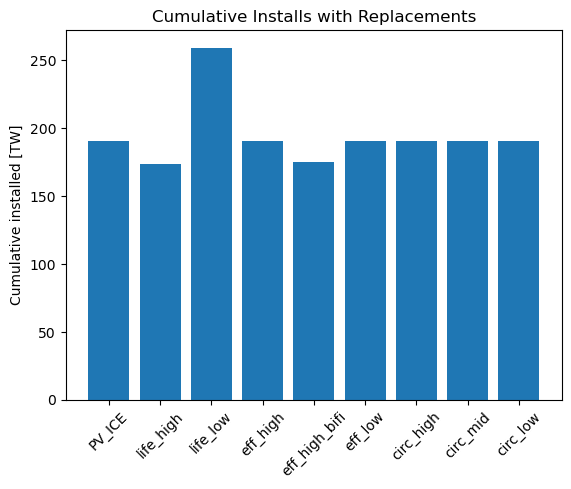

In [28]:
cumu_installs = cc_cumu.filter(like='newInstalled')
total_installed = cumu_installs.loc[2100]
total_installed.index= scennames_labels

plt.bar(scennames_labels, total_installed/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0.5, 1.0, 'Cumulative Area Deployed with Replacements')

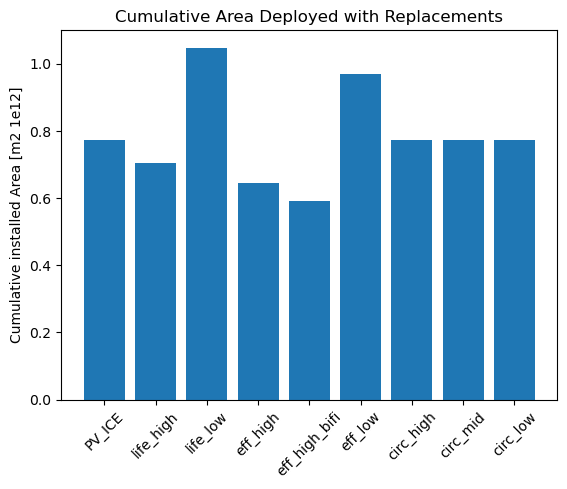

In [29]:
cumu_area_deployed = pd.DataFrame()

for scen in sim1.scenario.keys():
    area_deploy = sim1.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed = pd.concat([cumu_area_deployed,area_deploy], axis=1)
    
cumu_area_deployed.columns = sim1.scenario.keys()
cumu_area_deployed_total = cumu_area_deployed.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels, cumu_area_deployed.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

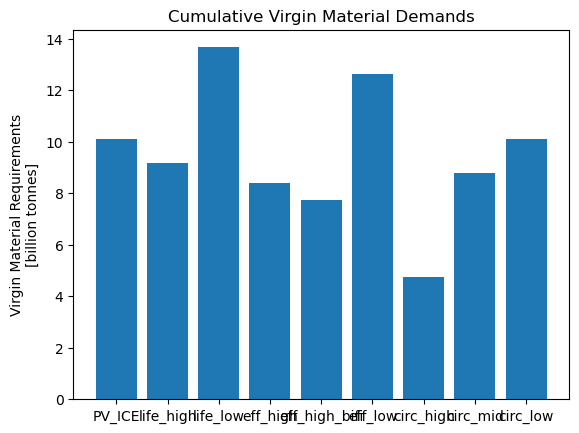

In [30]:
cumu_virgin_module = cc_cumu.filter(like='VirginStock_Module')
virgin = cumu_virgin_module.loc[2100]
virgin.index= scennames_labels

plt.bar(scennames_labels, virgin/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Lifecycle Wastes\n[billion tonnes]')

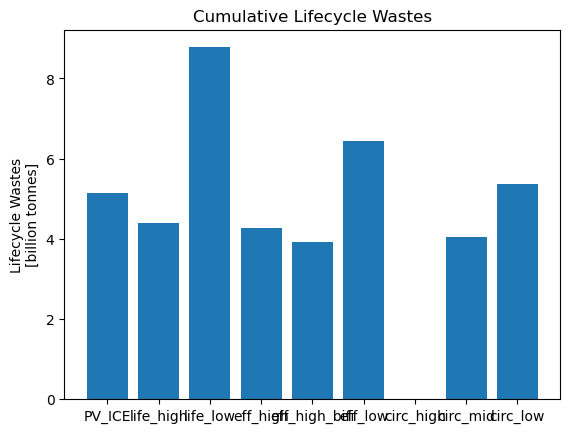

In [31]:
cumu_lifecycle_wastes = cc_cumu.filter(like='WasteAll_Module')
wastes = cumu_lifecycle_wastes.loc[2100]
wastes.index= scennames_labels

plt.bar(scennames_labels, wastes/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

Text(0, 0.5, 'Cumulative Energy Demands\n[TWh]')

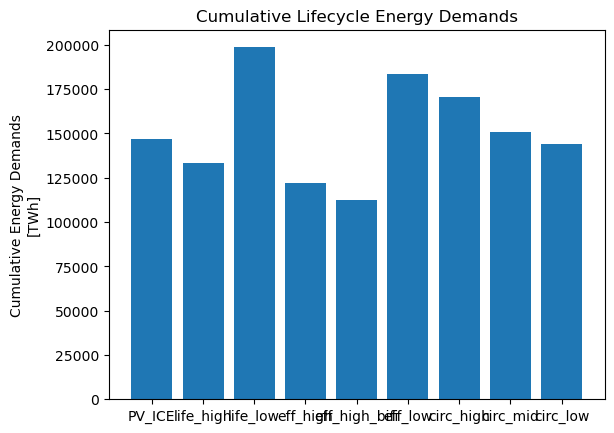

In [32]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
cumu_e_demands = e_annual_sumDemands_cumu.loc[2100]
cumu_e_demands.index= scennames_labels

plt.bar(scennames_labels, cumu_e_demands/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

In [33]:
e_demands_eff_high = energy_demands.filter(like='eff_high')
e_demands_eff_high_cumu = e_demands_eff_high.cumsum()

e_demands_eff_high_cumu

#plt.bar(e_demands_eff_high_cumu.columns, e_demands_eff_high_cumu.iloc[-1,:])

,eff_high_mod_MFG,eff_high_mod_Install,eff_high_mod_OandM,eff_high_mod_Repair,eff_high_mod_Demount,eff_high_mod_Store,eff_high_mod_Resell_Certify,eff_high_mod_ReMFG_Disassembly,eff_high_mod_Recycle_Crush,eff_high_glass_mat_extraction,...,eff_high_bifi_copper_mat_Landfill_fuel,eff_high_bifi_copper_mat_Recycled_HQ_fuel,eff_high_bifi_encapsulant_mat_MFG_virgin_fuel,eff_high_bifi_encapsulant_mat_MFGScrap_HQ_fuel,eff_high_bifi_encapsulant_mat_Landfill_fuel,eff_high_bifi_encapsulant_mat_Recycled_HQ_fuel,eff_high_bifi_backsheet_mat_MFG_virgin_fuel,eff_high_bifi_backsheet_mat_MFGScrap_HQ_fuel,eff_high_bifi_backsheet_mat_Landfill_fuel,eff_high_bifi_backsheet_mat_Recycled_HQ_fuel
year,,,,,,,,,,,,,,,,,,,,,
2000,5.595432e+10,5.724557e+07,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,5.347604e+08,...,0.0,0.0,5.968542e+09,0.0,0.0,0.0,1.131697e+10,0.0,0.0,0.0
2001,7.599869e+10,7.752961e+07,0.0,0.0,3.657513e-01,0.0,0.0,0.0,1.547705e+00,7.242440e+08,...,0.0,0.0,8.196241e+09,0.0,0.0,0.0,1.555949e+10,0.0,0.0,0.0
2002,1.003605e+11,1.019176e+08,0.0,0.0,2.862575e+01,0.0,0.0,0.0,1.211321e+02,9.520647e+08,...,0.0,0.0,1.087936e+10,0.0,0.0,0.0,2.070531e+10,0.0,0.0,0.0
2003,1.376869e+11,1.388866e+08,0.0,0.0,3.744197e+02,0.0,0.0,0.0,1.584386e+03,1.297412e+09,...,0.0,0.0,1.502408e+10,0.0,0.0,0.0,2.872989e+10,0.0,0.0,0.0
2004,2.141538e+11,2.138242e+08,0.0,0.0,2.361542e+03,0.0,0.0,0.0,9.993052e+03,1.997442e+09,...,0.0,0.0,2.354653e+10,0.0,0.0,0.0,4.540641e+10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2.084757e+15,5.842628e+12,0.0,0.0,2.900146e+12,0.0,0.0,0.0,1.227219e+13,6.622589e+13,...,0.0,0.0,4.745288e+14,0.0,0.0,0.0,1.490753e+15,0.0,0.0,0.0
2097,2.106728e+15,5.904238e+12,0.0,0.0,2.949143e+12,0.0,0.0,0.0,1.247953e+13,6.692494e+13,...,0.0,0.0,4.796983e+14,0.0,0.0,0.0,1.506818e+15,0.0,0.0,0.0
2098,2.130099e+15,5.969776e+12,0.0,0.0,3.002774e+12,0.0,0.0,0.0,1.270647e+13,6.766857e+13,...,0.0,0.0,4.850310e+14,0.0,0.0,0.0,1.523389e+15,0.0,0.0,0.0


Text(0, 0.5, 'Cumulative Net Energy [TWh]')

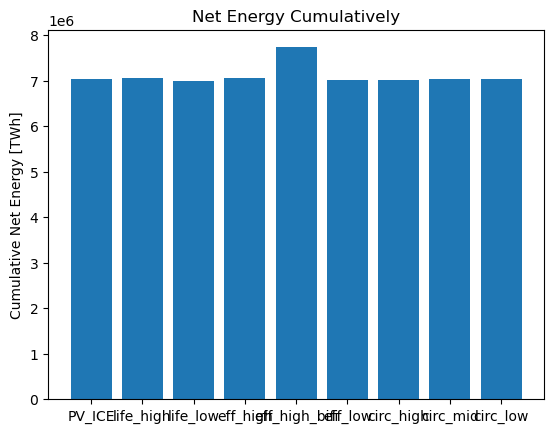

In [34]:
energyGen_cumu = energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames_labels
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels, netEnergy_cumu.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

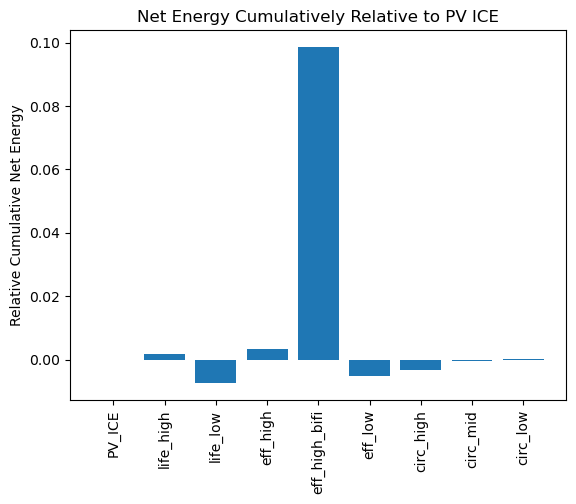

In [35]:
netEnergy_cumu_norm = netEnergy_cumu/netEnergy_cumu.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall = netEnergy_cumu_norm-1

plt.bar(scennames_labels, netEnergy_cumu_norm_waterfall.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

Text(0, 0.5, 'Unitless')

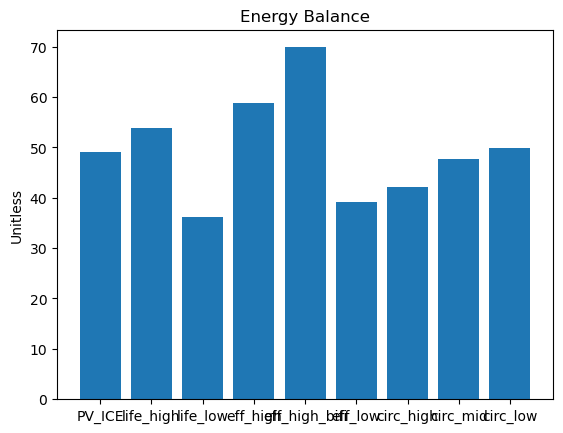

In [36]:
energyBalance_allyears = energyGen_cumu/e_annual_sumDemands_cumu
energyBalance = energyBalance_allyears.loc[2100]
energyBalance.index = scennames_labels

plt.bar(scennames_labels, energyBalance)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [37]:
discussTable = pd.concat([total_installed,cumu_area_deployed_total,virgin,wastes,
                          cumu_e_demands, netEnergy_cumu.loc[2100].T, energyBalance],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable

,replacements,area,virgin,wastes,energydemand,netenergy,energybalance
PV_ICE,1.906612e+08,7.728509e+11,1.008632e+10,5.139612e+09,1.466231e+17,7.041407e+18,49.023870
life_high,1.732992e+08,7.033519e+11,9.180273e+09,4.394466e+09,1.334777e+17,7.054552e+18,53.851911
life_low,2.593475e+08,1.047702e+12,1.366772e+10,8.777769e+09,1.986757e+17,6.989354e+18,36.179721
eff_high,1.906612e+08,6.435582e+11,8.398524e+09,4.276345e+09,1.221595e+17,7.065870e+18,58.841354
eff_high_bifi,1.752295e+08,5.914535e+11,7.718548e+09,3.929078e+09,1.122670e+17,7.735726e+18,69.904705
eff_low,1.906612e+08,9.678296e+11,1.263162e+10,6.447753e+09,1.835197e+17,7.004510e+18,39.167616
circ_high,1.906612e+08,7.728509e+11,4.746508e+09,3.423740e+06,1.702713e+17,7.017758e+18,42.215169
circ_mid,1.906612e+08,7.728509e+11,8.774549e+09,4.031466e+09,1.506761e+17,7.037354e+18,47.705189
circ_low,1.906612e+08,7.728509e+11,1.011723e+10,5.374146e+09,1.441443e+17,7.043885e+18,49.866894


In [38]:
discussTable = pd.concat([total_installed,virgin,wastes,
                          cumu_e_demands, netEnergy_cumu.loc[2100].T, energyBalance],
                         axis=1, keys=['replacements','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable

,replacements,virgin,wastes,energydemand,netenergy,energybalance
PV_ICE,1.906612e+08,1.008632e+10,5.139612e+09,1.466231e+17,7.041407e+18,49.023870
life_high,1.732992e+08,9.180273e+09,4.394466e+09,1.334777e+17,7.054552e+18,53.851911
life_low,2.593475e+08,1.366772e+10,8.777769e+09,1.986757e+17,6.989354e+18,36.179721
eff_high,1.906612e+08,8.398524e+09,4.276345e+09,1.221595e+17,7.065870e+18,58.841354
eff_high_bifi,1.752295e+08,7.718548e+09,3.929078e+09,1.122670e+17,7.735726e+18,69.904705
eff_low,1.906612e+08,1.263162e+10,6.447753e+09,1.835197e+17,7.004510e+18,39.167616
circ_high,1.906612e+08,4.746508e+09,3.423740e+06,1.702713e+17,7.017758e+18,42.215169
circ_mid,1.906612e+08,8.774549e+09,4.031466e+09,1.506761e+17,7.037354e+18,47.705189
circ_low,1.906612e+08,1.011723e+10,5.374146e+09,1.441443e+17,7.043885e+18,49.866894


In [39]:
discussTable_norm = (discussTable/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

,replacements,virgin,wastes,energydemand,netenergy,energybalance
PV_ICE,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
life_high,-9.106160e+00,-8.982934,-14.498109,-8.965404,0.186686,9.848348
life_low,3.602537e+01,35.507452,70.786595,35.500964,-0.739236,-26.199787
eff_high,-2.842171e-14,-16.733513,-16.796343,-16.684667,0.347424,20.025926
eff_high_bifi,-8.093759e+00,-23.475082,-23.553026,-23.431538,9.860519,42.593200
eff_low,-1.421085e-14,25.235163,25.452119,25.164294,-0.523996,-20.105010
circ_high,0.000000e+00,-52.941136,-99.933385,16.128567,-0.335845,-13.888544
circ_mid,0.000000e+00,-13.005443,-21.560901,2.764231,-0.057560,-2.689877
circ_low,0.000000e+00,0.306455,4.563261,-1.690547,0.035202,1.719618


In [40]:
sense_table.loc[:,cols]

NameError: name 'sense_table' is not defined

In [ ]:
sense_table = discussTable_norm.T.drop(columns=['PV_ICE'])
sense_table.loc[['replacements','virgin','wastes','energydemand'],:]*=-1

colors=['#0579C1','#9DC3E6', #life_high, life_low 
        '#FF0000', '#C00000','#FF9B9B',#eff_high, eff_high_bifi, eff_low
        '#CC9B00','#FFC000','#FFE699'#circular_high, circ_mid, circ_low
            ] 

metric_labels = ['Total\nDeployment','Virgin\nMaterial\nDemands','Lifecycle\nWastes',
                 'Energy\nDemands','Net\nEnergy','Energy\nBalance']

sens_scenarios = ['Life+10 years','Life-10 years',
                  'Efficiency+5%','Efficiency+5% & 0.9','Efficiency-5%',
                  'Recycling 100%','Recycling 25%','Recycling 0%']

plt.rcParams.update({'font.size': 14})

sensitivitybars, ax = plt.subplots(figsize=(8,5))

x=np.arange(len(metric_labels)) #label locations
bwidth = 0.25 # bar width

#lifes = ax.bar(x, sense_table.iloc[:,0:1], color=colors[0:1], label=sens_scenarios[0:1],
#              width=bwidth)

#effs = ax.bar(x+bwidth, sense_table.iloc[:,2:5], color=colors[2:5], label=sens_scenarios[2:5],
#              width=bwidth)

#circs = ax.bar(x+2*bwidth, sense_table.iloc[:,5:], color=colors[5:], label=sens_scenarios[5:],
#              width=bwidth)

ax.axhline(0, lw=1, color='black')
ax.grid(axis='y', color='0.7', ls='--')
ax.set_axisbelow(True) 
ax.axhspan(0,-100, facecolor='0.2', alpha=0.1)

plt.bar(x, sense_table.iloc[:,0], color=colors[0], label=sens_scenarios[0],width=bwidth)
plt.bar(x, sense_table.iloc[:,1], color=colors[1], label=sens_scenarios[1],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,3], color=colors[3], label=sens_scenarios[3],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,2], color=colors[2], label=sens_scenarios[2],width=bwidth)
plt.bar(x+bwidth, sense_table.iloc[:,4], color=colors[4], label=sens_scenarios[4],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,5], color=colors[5], label=sens_scenarios[5],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,6], color=colors[6], label=sens_scenarios[6],width=bwidth)
plt.bar(x+2*bwidth, sense_table.iloc[:,7], color=colors[7], label=sens_scenarios[7],width=bwidth)

plt.ylim(-80,100)
ax.set_xticks(x+2*bwidth / 2)
ax.set_xticklabels(metric_labels, fontsize=12)

plt.ylabel('% Worsening        % Improvement     ')
plt.title('Sensitivity of Design Aspects')

ax.legend(bbox_to_anchor=(1,1.02), fontsize=12)

sensitivitybars.savefig('energyresults-sensitivity-3aspects.png', dpi=300, bbox_inches='tight')

# Best Combos and Worst Combos
Now, what happens when we combine these?

In [ ]:
#load in a baseline and materials for modification
sim2 = PV_ICE.Simulation(name='sim2', path=testfolder)

sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg1_landfill','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb1_landfill','mod_EOL_pb2_stored','mod_EOL_pb3_reMFG']

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
                 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

#path control variables are:
# 'mat_PG4_Recycling_target'
# 'mat_MFG_scrap_Recycled'
# 'mod_EOL_pg4_recycled'

### Good Combos

In [ ]:
#Life+Eff

sim2.createScenario(name='good_eff_life', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_life'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_eff_life', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_eff_life', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_eff_life', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_eff_life', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

sim2.modifyScenario('good_eff_life', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #




In [ ]:
#Eff+Circ
sim2.createScenario(name='good_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('good_eff_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('good_eff_circ', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim2.modifyScenario('good_eff_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('good_eff_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_eff_circ', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_eff_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim2.scenario['good_eff_circ'].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #

sim2.modifyScenario('good_eff_circ', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']+5, start_year=2022) #

In [ ]:
#Life+Circ

sim2.createScenario(name='good_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['good_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('good_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']-0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('good_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']+10, start_year=2022)
#t90
sim2.modifyScenario('good_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']+10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('good_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']+10, start_year=2022) #

for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('good_life_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('good_life_circ', 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
sim2.modifyScenario('good_life_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('good_life_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)
    
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('good_life_circ', mod_circ_vars[var], 25.0, start_year=2022) #set recycle paths to 25%

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['good_life_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],100.0, start_year=2022) #
        sim2.scenario['good_life_circ'].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled',25.0, start_year=2022) #

### Bad Combos

In [ ]:
#life eff
sim2.createScenario(name='bad_life_eff', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_eff'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
#Lifetime and Degradation
#degradation rate:
sim2.modifyScenario('bad_life_eff', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_eff', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_eff', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022) #project lifetime of 25 years
#eff -5
sim2.modifyScenario('bad_life_eff', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

In [ ]:
#eff circ
sim2.createScenario(name='bad_eff_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_eff_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

sim2.modifyScenario('bad_eff_circ', 'mod_eff', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_eff']-5, start_year=2022) #

for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_eff_circ', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('bad_eff_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('bad_eff_circ', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim2.modifyScenario('bad_eff_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('bad_eff_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_eff_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [ ]:
#life circ
sim2.createScenario(name='bad_life_circ', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['bad_life_circ'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#degradation rate:
sim2.modifyScenario('bad_life_circ', 'mod_degradation', 
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_degradation']+0.1, start_year=2022) #standard current degrdation
#T50
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t50',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t50']-10, start_year=2022)
#t90
sim2.modifyScenario('bad_life_circ', 'mod_reliability_t90',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_reliability_t90']-10, start_year=2022) 
#Mod Project Lifetime
sim2.modifyScenario('bad_life_circ', 'mod_lifetime',
                    sim2.scenario['PV_ICE'].dataIn_m.loc[timeshift:,'mod_lifetime']-10, start_year=2022)
    
#0 circ
for var in range(0,len(mod_circ_vars)):
    sim2.modifyScenario('bad_life_circ', mod_circ_vars[var],0.0, start_year=2022) #set recycle to 0
    
for var in range(0,len(mod_alt_paths)):
    sim2.modifyScenario('bad_life_circ', mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0   

sim2.modifyScenario('bad_life_circ', 'mod_EOL_collection_eff',0.0, start_year=2022) #collect nothing
sim2.modifyScenario('bad_life_circ','mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
sim2.modifyScenario('bad_life_circ','mod_EOL_pg1_landfill',100.0,start_year=2022)

for mat in range (0, len(MATERIALS)):
    for mvar in range(0,len(mat_circ_vars)):
        sim2.scenario['bad_life_circ'].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar],0.0, start_year=2022) #

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

In [ ]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

In [ ]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [ ]:
sim2.scenario.keys()

In [ ]:
bifiFactors = {'PV_ICE':0.0,
               'good_eff_life':0.9, 
               'good_eff_circ': 0.9,
               'good_life_circ': 0.0,
               'bad_life_eff': 0.0,
               'bad_eff_circ':0.0,
               'bad_life_circ': 0.0
              } 

#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f] #assign column
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

## Calculate Mass Flow: Identical Installs

In [ ]:
#CALCULATE MASS FLOW= 

for scen in sim2.scenario.keys(): #loop over scenarios
    sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

In [ ]:
#sim1.calculateMassFlow()

In [ ]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
sim2.saveSimulation(customname='_EnergySensitivity-goodbad_identicalinstalls')

In [ ]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')

plt.plot(ii_cumu2['newInstalledCapacity_sim2_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')

plt.plot(effective_capacity/1e6, label=sim2.scenario.keys())

plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
## Calculate Flows: Capacity Compensation

In [ ]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim2.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim2.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim2.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim2.calculateMassFlow(scenarios=[scen], bifacialityfactors=bifiPathDict[scen])

sim2.calculateEnergyFlow()

In [ ]:
sim2.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly2, cc_cumu2 = sim2.aggregateResults() #have to do this to get auto plots
cc_yearly2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_yearly.csv'))
cc_cumu2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_cumu.csv'))

#aggregate results - energy
allenergy2, energyGen2, energy_demands2 = sim2.aggregateEnergyResults()
allenergy2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_allenergy.csv'))
energyGen2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_energyGen.csv'))
energy_demands2.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_energy_demands.csv'))

UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_sensitivity_combos_underInstalls.csv'))

In [ ]:
scennames_labels2=sim2.scenario.keys()

In [ ]:
cumu_installs2 = cc_cumu2.filter(like='newInstalled')
total_installed2 = cumu_installs2.loc[2100]
total_installed2.index= scennames_labels2

plt.bar(scennames_labels2, total_installed2/1e6)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_area_deployed2 = pd.DataFrame()

for scen in sim2.scenario.keys():
    area_deploy = sim2.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed2 = pd.concat([cumu_area_deployed2,area_deploy], axis=1)
    
cumu_area_deployed2.columns = sim2.scenario.keys()
cumu_area_deployed2_total = cumu_area_deployed2.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels2, cumu_area_deployed2.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

In [ ]:
cumu_virgin_module2 = cc_cumu2.filter(like='VirginStock_Module')
virgin2 = cumu_virgin_module2.loc[2100]
virgin2.index= scennames_labels2

plt.bar(scennames_labels2, virgin2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
plt.xticks(rotation=45)

In [ ]:
cumu_lifecycle_wastes2 = cc_cumu2.filter(like='WasteAll_Module')
wastes2 = cumu_lifecycle_wastes2.loc[2100]
wastes2.index= scennames_labels2

plt.bar(scennames_labels2, wastes2/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')
plt.xticks(rotation=45)

In [ ]:
e_annual_sumDemands2 = energy_demands2.filter(like='demand_total')
e_annual_sumDemands_cumu2 = e_annual_sumDemands2.cumsum()
cumu_e_demands2 = e_annual_sumDemands_cumu2.loc[2100]
cumu_e_demands2.index= scennames_labels2

plt.bar(scennames_labels2, cumu_e_demands2/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')

In [ ]:
energyGen_cumu2 = energyGen2.cumsum()
energyGen_cumu2.columns = e_annual_sumDemands_cumu2.columns = scennames_labels2
netEnergy_cumu2 = energyGen_cumu2.loc[[2100]] - e_annual_sumDemands_cumu2.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels2, netEnergy_cumu2.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

In [ ]:
netEnergy_cumu_norm2 = netEnergy_cumu2/netEnergy_cumu2.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall2 = netEnergy_cumu_norm2-1

plt.bar(scennames_labels2, netEnergy_cumu_norm_waterfall2.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

In [ ]:
energyBalance_allyears2 = energyGen_cumu2/e_annual_sumDemands_cumu2
energyBalance2 = energyBalance_allyears2.loc[2100]
energyBalance2.index = scennames_labels2

plt.bar(scennames_labels2, energyBalance2)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [ ]:
discussTable2 = pd.concat([total_installed2,cumu_area_deployed2_total,virgin2,wastes2,
                           cumu_e_demands2, netEnergy_cumu2.loc[2100].T, energyBalance2],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable2

In [ ]:
discussTable_all = pd.concat([discussTable,discussTable2], axis=0)
discussTable_all

In [ ]:
discussTable_norm = (discussTable_all/discussTable.loc['PV_ICE'])*100-100
discussTable_norm

In [ ]:
graph_order = ['life_high','life_low','good_eff_life','bad_life_eff','eff_high','eff_high_bifi','eff_low','good_eff_circ',
               'bad_eff_circ','circ_high','circ_low','good_life_circ','bad_life_circ']


# Sensitivity of Energy to Circularity
Above it appears that both increasing and decreasing circularity reduce energy demands, which would imply there might be a bell curve or threshold situation. OR more likely, open vs closed loop matters a lot.

In [66]:
MATERIALS_recycle = ['glass','silicon','silver','aluminium_frames']
MATERIALS_NOrecycle = ['copper','encapsulant','backsheet']

In [67]:
#load in a baseline and materials for modification
sim3 = PV_ICE.Simulation(name='sim3', path=testfolder)

sim3.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Sensitivity
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [68]:
mod_circ_vars = ['mod_EOL_pg4_recycled', 'mod_EOL_pb4_recycled']

mod_alt_paths = ['mod_EOL_pg0_resell','mod_EOL_pg2_stored','mod_EOL_pg3_reMFG',
                 'mod_EOL_reMFG_yield','mod_EOL_sp_reMFG_recycle',
                 'mod_EOL_pb2_stored','mod_EOL_pb3_reMFG'] #removed landfills

mat_circ_vars = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 
                 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
                 'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG']

#mat_mfgscrap = ['mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff', 'mat_MFG_scrap_Recycled_into_HQ',
#                 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG']

In [55]:
#range of circularity / closed loop vs downcycling
rrates = pd.Series(range(0,101,10))
for r in range(0,len(rrates)): print(rrates[r])

0
10
20
30
40
50
60
70
80
90
100


In [69]:
rrates = pd.Series([0,50,100])

In [70]:
#closed loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_CL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_alt_paths)):
        sim3.modifyScenario(scenname, mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0 (landfill should auto adjust)
    
    sim3.modifyScenario(scenname, 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
    sim3.modifyScenario(scenname,'mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
    sim3.modifyScenario(scenname,'mod_EOL_pg1_landfill',100.0,start_year=2022)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], rrates[r], start_year=2022) #recycle modules at the rate at EoL

    for mat in range (0, len(MATERIALS)):
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar], 100.0, start_year=2022) #100% recycle HQ path and yield
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled', rrates[r], start_year=2022) # MFG scrap at rate


In [46]:
#open loop at various rates
for r in range(0,len(rrates)):
    scenname = 'circ_OL_'+str(rrates[r])
    sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)
    
    for var in range(0,len(mod_alt_paths)):
        sim3.modifyScenario(scenname, mod_alt_paths[var], 0.0, start_year=2022) #set non recycle to 0
        
    sim3.modifyScenario(scenname, 'mod_EOL_collection_eff',100.0, start_year=2022) #collect everything
    sim3.modifyScenario(scenname,'mod_EOL_pb1_landfill',100.0,start_year=2022) #landfill up just in case
    sim3.modifyScenario(scenname,'mod_EOL_pg1_landfill',100.0,start_year=2022)
    
    for var in range(0,len(mod_circ_vars)):
        sim3.modifyScenario(scenname, mod_circ_vars[var], rrates[r], start_year=2022) #recycle modules at the rate

    for mat in range (0, len(MATERIALS)):
        for mvar in range(0,len(mat_circ_vars)):
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], mat_circ_vars[mvar], 100.0, start_year=2022) # 100% recycle HQ path and yield
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled', rrates[r], start_year=2022) #MFG scrap at rate
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_MFG_scrap_Recycled_into_HQ', 0.0, start_year=2022) #Open loop
            sim3.scenario[scenname].modifyMaterials(MATERIALS[mat], 'mat_EOL_RecycledHQ_Reused4MFG', 0.0, start_year=2022) #Open loop

In [71]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE glass : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  circ_CL_0
circ_CL_0 glass : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_0 glass : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  circ_CL_50
circ_CL_50 glass : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_50 glass : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  circ_CL_100
circ_CL_100 glass : Data trimmed for Energy, years now encompass  2000  to  2100
circ_CL_100 glass : Data trimmed for Mass, years now encompass  2000  to  2100


In [72]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
global_projection.iloc[-1,:]

#fig, ax1 = plt.subplots()

#ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
#ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
#ax1.set_ylim(0,90)
#ax1.set_xlim(2000,2100)
#ax2 = ax1.twinx()
#ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
#ax2.set_ylabel('Annual Installations [TW]')
#ax2.set_ylim(0,5)
#plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

World_cum              85966000.0
World_annual_[MWdc]      219320.0
Name: 2100, dtype: float64

In [73]:
#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

In [74]:
sim3.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.


In [75]:
UnderInstall_df = pd.DataFrame()


for row in range (0,len(sim3.scenario['PV_ICE'].dataIn_m)): #loop over length of years
    print(row)
    for scen in sim3.scenario.keys(): #loop over scenarios
        print(scen)
        Under_Installment = global_projection.iloc[row,0] - ((sim3.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        UnderInstall_df.loc[row,scen] = Under_Installment #save the underinstallment as df
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim3.calculateMassFlow(scenarios=[scen])

sim3.calculateEnergyFlow()

0
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
1
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
2
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
3
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
4
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
5
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
6
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
7
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
8
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
9
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
10
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
11
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
12
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
13
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
14
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
15
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
16
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
17
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
18
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
19
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
20
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
21
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787030969.8975344  tonnes.
22
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787195276.6245084  tonnes.
23
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195512687.921445  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787421571.4978733  tonnes.
24
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195614667.8138733  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2787753322.5102015  tonnes.
25
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1195775819.6151226  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2788227043.1910014  tonnes.
26
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1196020315.988972  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2788888852.2380667  tonnes.
27
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1196528766.3061416  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2789926501.1222167  tonnes.
28
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1197206976.865125  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2791301481.9354954  tonnes.
29
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1198098950.6992333  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2793101589.7211823  tonnes.
30
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1199225221.5520906  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2795367450.4316335  tonnes.
31
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1200407049.126549  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2797740088.0142555  tonnes.
32
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1202029983.50929  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2800993751.8636756  tonnes.
33
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1203618024.103043  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2804174565.4355016  tonnes.
34
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1205835609.1837645  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2808613754.4781585  tonnes.
35
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1208247096.370369  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2813439329.2291484  tonnes.
36
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1210543108.2528756  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2818032791.4253945  tonnes.
37
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1213654933.462824  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2824257545.2388563  tonnes.
38
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1216556251.1761856  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2830060746.3905454  tonnes.
39
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1219815395.9817655  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2836579374.5242863  tonnes.
40
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1223911599.439073  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2844772000.2107983  tonnes.
41
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1227917863.637799  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2852784634.3728247  tonnes.
42
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1232362554.0966835  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2861674070.7769837  tonnes.
43
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1237682005.386176  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2872313003.2230663  tonnes.
44
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1243623531.4921706  tonnes.
circ_CL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2884196069.6063523  tonnes.
45
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1249354349.4821236  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2895657711.0240116  tonnes.
46
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1256282627.543862  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2909514269.5710473  tonnes.
47
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1262987902.2769134  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2922924819.8279414  tonnes.
48
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1270808339.369857  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2938565694.2934284  tonnes.
49
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1279211442.3334656  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2955371900.3007436  tonnes.
50
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1289220348.514624  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2975389712.6847734  tonnes.
51
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1300064157.7762566  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2997077331.212422  tonnes.
52
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1309434032.628738  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3015817080.9179287  tonnes.
53
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1319233582.9737425  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3035416181.6079946  tonnes.
54
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1329511448.7673142  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3055971913.195142  tonnes.
55
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1340301727.8576667  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3077552471.375847  tonnes.
56
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1351616421.9979026  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3099775636.2760825  tonnes.
57
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1364513695.9532387  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3120846512.782079  tonnes.
58
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1378408227.1509354  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3141313723.7506366  tonnes.
59
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1392933669.0059035  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3161209910.5689354  tonnes.
60
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1407348970.0986652  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3180885815.8628216  tonnes.
61
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1421722366.1468823  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3200477911.0676184  tonnes.
62
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1432743218.2107613  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3213364918.3037395  tonnes.
63
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1442776166.0334294  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3224276117.0574393  tonnes.
64
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1451795301.6705298  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3233159691.4400015  tonnes.
65
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1461045632.5100677  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3242505656.2274404  tonnes.
66
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1434412448.67962  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3180084591.6749086  tonnes.
67
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1403105778.2738883  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3108316553.9718065  tonnes.
68
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1367717892.3147469  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  3028386085.161887  tonnes.
69
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1327834618.3411388  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2939464840.3230333  tonnes.
70
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1283983431.3393137  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2842607769.427746  tonnes.
71
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1236550116.480317  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2738586442.8181143  tonnes.
72
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1184802156.3593884  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2625935825.684617  tonnes.
73
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1129735462.4988825  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2506647741.0719676  tonnes.
74
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1070898685.5951356  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2379819490.372835  tonnes.
75
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  1007929470.7211835  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2245536746.9510183  tonnes.
76
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  941721477.1492664  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  2105520501.6696033  tonnes.
77
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  871860617.306156  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1959083922.049504  tonnes.
78
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  798048308.5283169  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1805724760.735071  tonnes.
79
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  720639961.7382035  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1646019453.358442  tonnes.
80
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  640538165.457437  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1481457612.8480675  tonnes.
81
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  556702330.450956  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1310308917.5888746  tonnes.
82
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  470722911.13392013  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  1135215822.7825544  tonnes.
83
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  381825289.0848462  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  954885228.7516917  tonnes.
84
PV_ICE


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  291085500.9494742  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  771108458.209719  tonnes.
85
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  198385758.85094035  tonnes.
circ_CL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  583674688.7977773  tonnes.
86
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  192127121.82645145  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  541258251.8884532  tonnes.
87
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  187154951.07751918  tonnes.
circ_CL_100


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  500953793.6608844  tonnes.
88
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  181715757.88339683  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  473287878.4664393  tonnes.
89
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  175748045.93087718  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  452197757.66976273  tonnes.
90
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  169197202.9303357  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  429941374.7770426  tonnes.
91
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  162019194.1969035  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  406430660.41854113  tonnes.
92
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  153237382.88759795  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  379712340.90829295  tonnes.
93
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  143351863.42794776  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  350786605.0973553  tonnes.
94
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  132451065.46736209  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  319830312.2845469  tonnes.
95
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  120642641.94563782  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  287058768.3494613  tonnes.
96
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  107921195.97952244  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  252461179.52559337  tonnes.
97
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  85607297.76014537  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  198678686.19520208  tonnes.
98
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  60330520.69348625  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  138970435.17024675  tonnes.
99
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_50  =  32049193.35185724  tonnes.
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  circ_CL_100  =  73253083.5953516  tonnes.
100
PV_ICE
>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_0
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_0
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_50
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_50
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass
circ_CL_100
>>>> Calculating Material Flows <<<<

Working on Scenario:  circ_CL_100
********************


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_5392\2775174709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed


Finished Area+Power Generation Calculations
==> Working on Material :  glass


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PV_ICE
********************
==> Working on Energy for Material :  glass
Working on Scenario:  circ_CL_0
********************
==> Working on Energy for Material :  glass
Working on Scenario:  circ_CL_50
********************
==> Working on Energy for Material :  glass
Working on Scenario:  circ_CL_100
********************
==> Working on Energy for Material :  glass


In [76]:
sim3.saveSimulation(customname='_EnergySensitivity_withreplacements')

#aggregate results - mass
cc_yearly3, cc_cumu3 = sim3.aggregateResults() #have to do this to get auto plots
cc_yearly3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_yearly3.csv'))
cc_cumu3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_cumu3.csv'))

#aggregate results - energy
allenergy3, energyGen3, energy_demands3 = sim3.aggregateEnergyResults()
allenergy3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_allenergy3.csv'))
energyGen3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energyGen3.csv'))
energy_demands3.to_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energy_demands3.csv'))

#UnderInstall_df.to_csv(os.path.join(testfolder, 'cc_10scen_underInstalls.csv'))

:) Saved Input and Output Dataframes


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2237: SettingWithCopyWarning: 
A valu

In [77]:
#read in files for speed
allenergy3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_allenergy3.csv'), index_col=0)
energyGen3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energyGen3.csv'), index_col=0)
energy_demands3 = pd.read_csv(os.path.join(testfolder, 'cc_sensitivity_CLOL_energy_demands3.csv'), index_col=0)

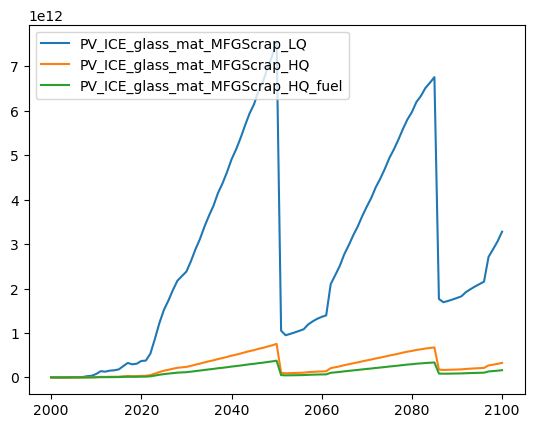

In [78]:
pvice_glassmfgscrap = allenergy3.filter(like='PV_ICE').filter(like='glass').filter(like='MFGScrap')
plt.plot(pvice_glassmfgscrap)
plt.legend(pvice_glassmfgscrap.columns)


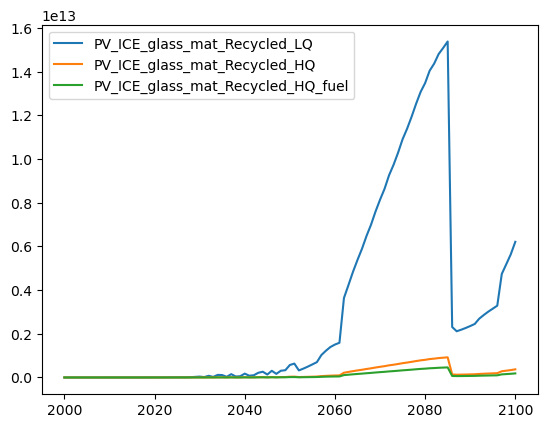

In [79]:

pvice_glassrecycled = allenergy3.filter(like='PV_ICE').filter(like='glass').filter(like='Recycled')
plt.plot(pvice_glassrecycled)
plt.legend(pvice_glassrecycled.columns)

In [80]:
cl0_allenergy = allenergy3.filter(like='CL_0')
cl0_modenergy = cl0_allenergy.filter(like='mod')
cl0_glassenergy = cl0_allenergy.filter(like='glass')
cl0_glassrecycled = cl0_glassenergy.filter(like='Recycled')
cl0_glassmfgscrap = cl0_glassenergy.filter(like='MFGScrap')

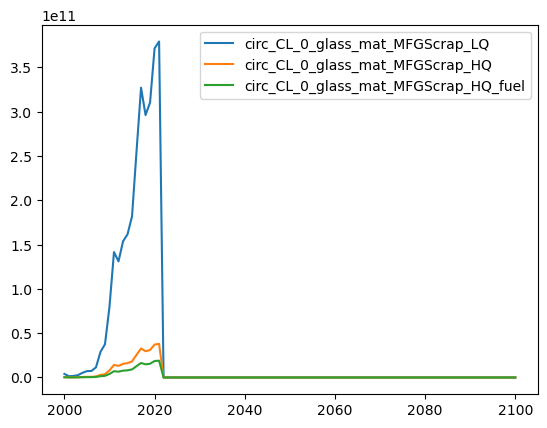

In [81]:
for cols in range(0,len(cl0_glassmfgscrap.columns)):
    plt.plot(cl0_glassmfgscrap.iloc[:,cols], label=cl0_glassmfgscrap.columns[cols])
    
plt.legend()

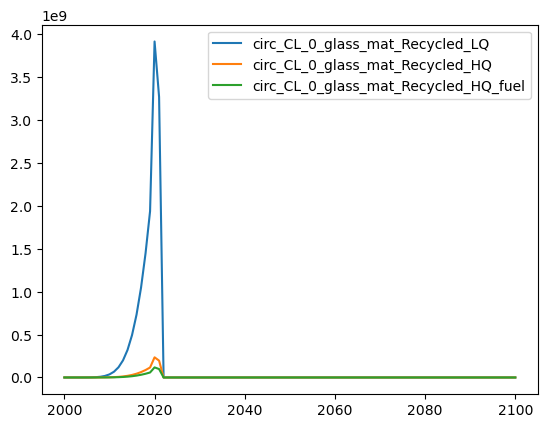

In [82]:
for cols in range(0,len(cl0_glassrecycled.columns)):
    plt.plot(cl0_glassrecycled.iloc[:,cols], label=cl0_glassrecycled.columns[cols])
    
plt.legend()

In [83]:
scennames_labels3=sim3.scenario.keys()

Text(0.5, 1.0, 'Cumulative Installs with Replacements')

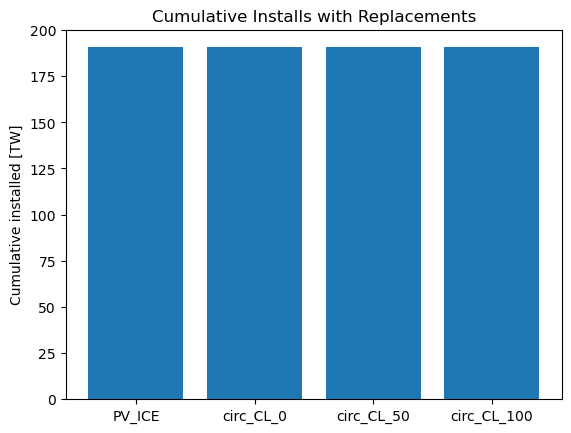

In [84]:
cumu_installs3 = cc_cumu3.filter(like='newInstalled')
total_installed3 = cumu_installs3.loc[2100]
total_installed3.index= scennames_labels3

plt.bar(scennames_labels3, total_installed3/1e6)
#plt.xticks(rotation=90)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,410)

Text(0.5, 1.0, 'Cumulative Area Deployed with Replacements')

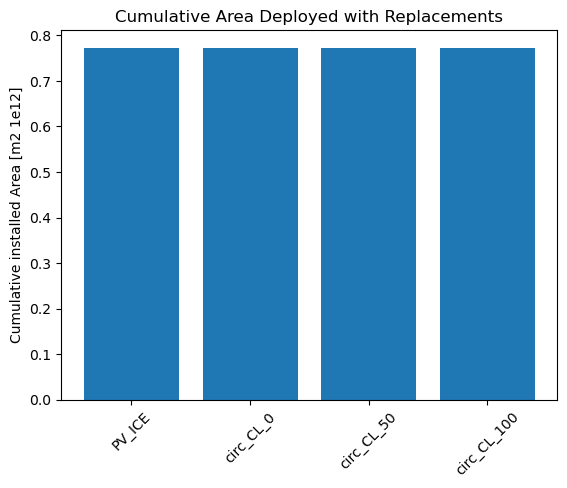

In [85]:
cumu_area_deployed3 = pd.DataFrame()

for scen in sim3.scenario.keys():
    area_deploy = sim3.scenario[scen].dataOut_m['Area'].cumsum()
    cumu_area_deployed3 = pd.concat([cumu_area_deployed3,area_deploy], axis=1)
    
cumu_area_deployed3.columns = sim3.scenario.keys()
cumu_area_deployed3_total = cumu_area_deployed3.iloc[-1,:]
#cumu_area_deployed

plt.bar(scennames_labels3, cumu_area_deployed3.iloc[-1,:]/1e12)
plt.xticks(rotation=45)
plt.ylabel('Cumulative installed Area [m2 1e12]')
plt.title('Cumulative Area Deployed with Replacements')
#plt.ylim(0,410)

Text(0, 0.5, 'Virgin Material Requirements\n[billion tonnes]')

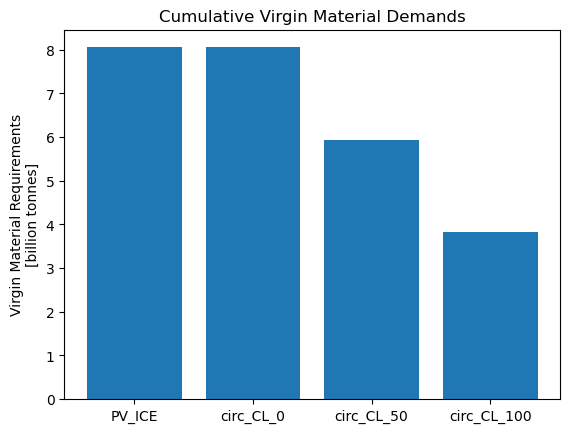

In [86]:
cumu_virgin_module3 = cc_cumu3.filter(like='VirginStock_Module')
virgin3 = cumu_virgin_module3.loc[2100]
virgin3.index= scennames_labels3

plt.bar(scennames_labels3, virgin3/1e9)
#plt.legend(scennames)
plt.title('Cumulative Virgin Material Demands')
plt.ylabel('Virgin Material Requirements\n[billion tonnes]')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Lifecycle Wastes\n[billion tonnes]')

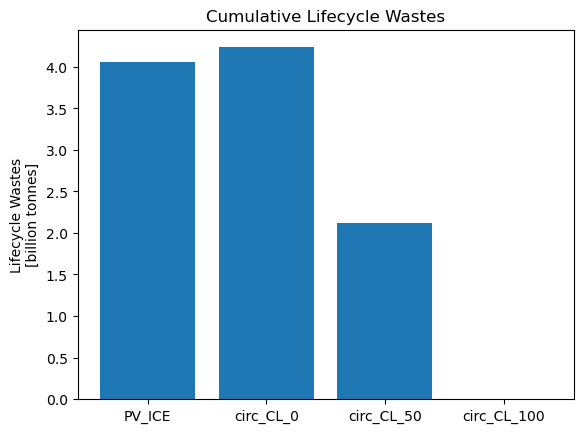

In [87]:
cumu_lifecycle_wastes3 = cc_cumu3.filter(like='WasteAll_Module')
wastes3 = cumu_lifecycle_wastes3.loc[2100]
wastes3.index= scennames_labels3

plt.bar(scennames_labels3, wastes3/1e9)
#plt.legend(scennames)
plt.title('Cumulative Lifecycle Wastes')
plt.ylabel('Lifecycle Wastes\n[billion tonnes]')

In [90]:
cumu_e_demands3

PV_ICE         3.201590e+16
circ_CL_0      3.140992e+16
circ_CL_50     2.982128e+16
circ_CL_100    2.823264e+16
Name: 2100, dtype: float64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

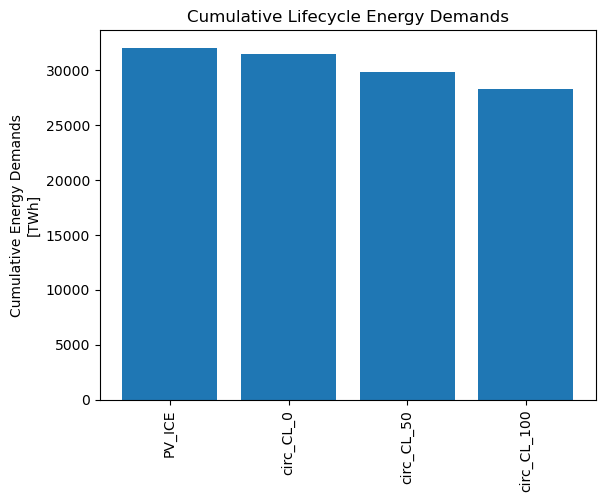

In [89]:
e_annual_sumDemands3 = energy_demands3.filter(like='demand_total')
e_annual_sumDemands_cumu3 = e_annual_sumDemands3.cumsum()
cumu_e_demands3 = e_annual_sumDemands_cumu3.loc[2100]
cumu_e_demands3.index= scennames_labels3

plt.bar(scennames_labels3, cumu_e_demands3/1e12)
plt.title('Cumulative Lifecycle Energy Demands')
plt.ylabel('Cumulative Energy Demands\n[TWh]')
plt.xticks(rotation=90)

In [ ]:
cumu_e_demands3_norm = cumu_e_demands3/cumu_e_demands3.loc['PV_ICE']-1
plt.bar(scennames_labels3, cumu_e_demands3_norm)
plt.title('Energy Demands - Normalized')
plt.ylabel('Fraction Change from Baseline')
plt.xticks(rotation=90)

In [ ]:
energyGen3

In [ ]:
energyGen_cumu3 = energyGen3.cumsum()
energyGen_cumu3.columns = e_annual_sumDemands_cumu3.columns = scennames_labels3
netEnergy_cumu3 = energyGen_cumu3.loc[[2100]] - e_annual_sumDemands_cumu3.loc[[2100]]
#netEnergy_cumu.index= scennames_labels

plt.bar(scennames_labels3, netEnergy_cumu3.loc[2100]/1e12)
plt.title('Net Energy Cumulatively')
plt.ylabel('Cumulative Net Energy [TWh]')

In [ ]:
netEnergy_cumu_norm3 = netEnergy_cumu3/netEnergy_cumu3.loc[2100,'PV_ICE']
netEnergy_cumu_norm_waterfall3 = netEnergy_cumu_norm3-1

plt.bar(scennames_labels3, netEnergy_cumu_norm_waterfall3.loc[2100])
plt.title('Net Energy Cumulatively Relative to PV ICE')
plt.ylabel('Relative Cumulative Net Energy')
#plt.ylim(-0.026,0.005)
plt.plot(0.0, lw=2)
plt.xticks(rotation=90)

In [ ]:
energyBalance_allyears3 = energyGen_cumu3/e_annual_sumDemands_cumu3
energyBalance3 = energyBalance_allyears3.loc[2100]
energyBalance3.index = scennames_labels3

plt.bar(scennames_labels3, energyBalance3)
plt.title('Energy Balance')
plt.ylabel('Unitless')

In [ ]:
energyBalance3_norm = energyBalance3/energyBalance3.loc['PV_ICE']-1
plt.bar(scennames_labels3, energyBalance3_norm)
plt.title('Energy Balance - Normalized')
plt.ylabel('Unitless')
plt.xticks(rotation=90)

In [ ]:
discussTable3 = pd.concat([total_installed3,cumu_area_deployed3_total,virgin3,wastes3,
                           cumu_e_demands3, netEnergy_cumu3.loc[2100].T, energyBalance3],
                         axis=1, keys=['replacements','area','virgin','wastes','energydemand','netenergy','energybalance'])
#discussTable.to_csv(os.path.join(testfolder,'discussiontable.csv'))
discussTable3

In [ ]:
discussTable3_norm = (discussTable3/discussTable3.loc['PV_ICE'])*100-100
discussTable3_norm